In [39]:
from torchvision import datasets, transforms

train_data = datasets.MNIST(
	root="data",
	train=True,
	download=True,
	transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
	root="data",
	train=False,
	download=True,
	transform=transforms.ToTensor()
)

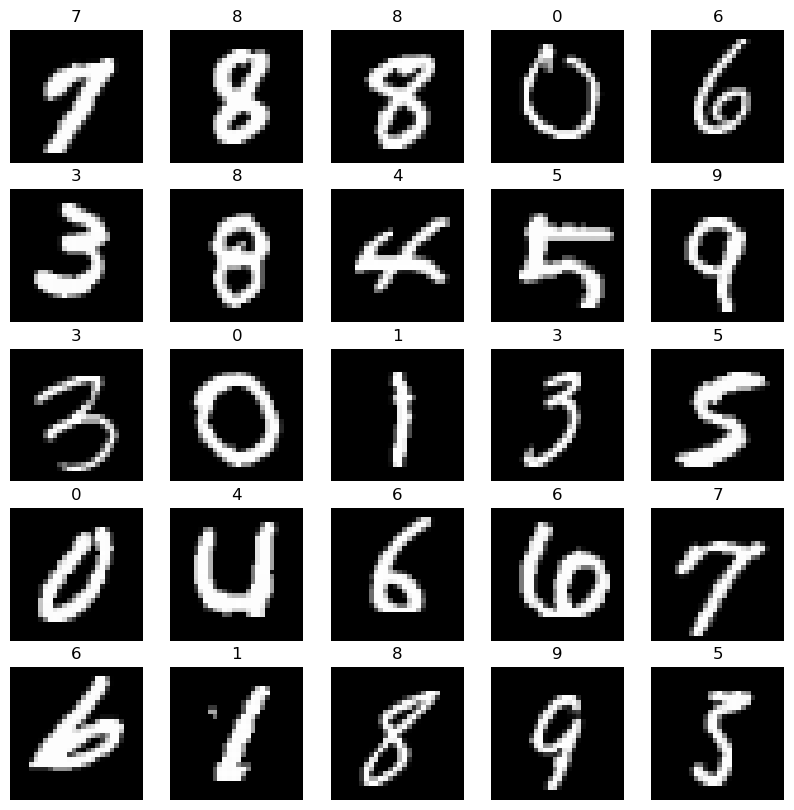

In [40]:
from matplotlib import pyplot as plt
from torch import randint

fig = plt.figure(figsize=(10, 10))
rows,cols = 5, 5
for i in range(1,26):
	rnd = randint(0,len(train_data),(1,)).item()
	img, lbl = train_data[rnd]
	img = img.squeeze()
	fig.add_subplot(rows, cols, i)
	plt.imshow(img, cmap="gray")
	plt.title(lbl)
	plt.axis(False)

In [41]:
import torch

batch_size= 32
train_loader = torch.utils.data.DataLoader(
	dataset=train_data,
	batch_size=batch_size,
	shuffle=True
)
test_loader = torch.utils.data.DataLoader(
	dataset=test_data,
	batch_size=batch_size,
	shuffle=True
)
len(train_loader), len(test_loader)

(1875, 313)

In [42]:
from torch import nn
class NumberClassifier(nn.Module):
	def __init__(self):
		super().__init__()
		self.stack = nn.Sequential(
			nn.Flatten(),
			nn.Linear(in_features=28*28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=10)
		)
	
	def forward(self, x: torch.Tensor) -> torch.Tensor :
		return self.stack(x)

In [43]:
mdl = NumberClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
	params=mdl.parameters(),
	lr=0.01
)
def acc_fn(preds: torch.Tensor, target: torch.Tensor) -> float:
	sum = 0
	for x, y in zip(preds, target):
		sum+= 1.0 if x.argmax()==y else 0
	return sum/32

In [44]:
epochs = 1
itr = 0
for epoch in range(epochs):
	for x,y in train_loader:
		itr+=1
		preds = mdl(x)
		loss = loss_fn(preds, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		
		if itr%100==0:
			with torch.inference_mode():
				total_acc = 0
				for test_x, test_y in test_loader:
					test_preds = mdl(test_x)
					total_acc += acc_fn(test_preds, test_y)
					
				print(f"{total_acc/len(test_loader)*100:.2f}%")

9.70%
20.19%
37.62%
41.61%
41.70%
45.62%
54.51%
64.39%
69.93%
77.59%
78.58%
80.80%
81.52%
81.89%
83.39%
84.53%
85.15%
85.06%
